In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from glob import glob
import os
import alter as al
import random

In [2]:
def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    #print(filename)
    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')

    gender = 0 if gender == 'M' else 1
    lr = 0 if lr == 'Left' else 1

    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4

    if 100 >= int(subject_id):
        print(filename)
        rannumx = random.randint(-10, 10)
        rannumy = random.randint(-10, 10)
        randomr = random.randint(30, 50)
        al.rotate_Image(img_path, 120 + rannumx, 130 + rannumy, 30, randomr, "Altered/Altered-Easy/"+filename+"_CR.BMP")
        rannumx = random.randint(-10, 10)
        rannumy = random.randint(-10, 10)
        randomr = random.randint(60, 80)
        al.rotate_Image(img_path, 120 + rannumx, 130 + rannumy, 50, randomr, "Altered/Altered-Medium/"+filename+"_CR.BMP")
        rannumx = random.randint(-10, 10)
        rannumy = random.randint(-10, 10)
        randomr = random.randint(90, 120)
        al.rotate_Image(img_path, 120 + rannumx, 130 + rannumy, 70, randomr, "Altered/Altered-Hard/"+filename+"_CR.BMP")


        rannumx = random.randint(-10, 10)
        rannumy = random.randint(-10, 10)
        al.obliterate_Image(img_path, 120 + rannumx, 130 + rannumy, 30, "Altered/Altered-Easy/"+filename+"_Obi.BMP")
        rannumx = random.randint(-10, 10)
        rannumy = random.randint(-10, 10)
        al.obliterate_Image(img_path, 120 + rannumx, 130 + rannumy, 50, "Altered/Altered-Medium/"+filename+"_Obi.BMP")
        rannumx = random.randint(-10, 10)
        rannumy = random.randint(-10, 10)
        al.obliterate_Image(img_path, 120 + rannumx, 130 + rannumy, 70, "Altered/Altered-Hard/"+filename+"_Obi.BMP")

    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)


def extract_label2(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    subject_id, etc = filename.split('__')
    gender, lr, finger, _, _ = etc.split('_')

    gender = 0 if gender == 'M' else 1
    lr = 0 if lr == 'Left' else 1

    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4

    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

5007
1__M_Right_index_finger
2__F_Right_index_finger
3__F_Right_index_finger
4__M_Right_index_finger
5__M_Right_index_finger
6__M_Right_index_finger
7__F_Right_index_finger
(96, 96)


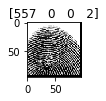

In [4]:
img_list = sorted(glob('Real/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96, 1), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    img_r = img[:, :, np.newaxis]
    imgs[i] = img_r
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label(img_path)

np.savez('dataset/x_real.npz', data=imgs)
np.save('dataset/y_real.npy', labels)

# plt.figure(figsize=(1, 1))
# plt.title(labels[-441])
# plt.imshow(imgs[-441], cmap='gray')

14969


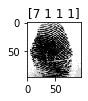

In [6]:
img_list = sorted(glob('Altered/Altered-Easy/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96, 1), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    img_r = img[:, :, np.newaxis]
    imgs[i] = img_r
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('dataset/x_easy.npz', data=imgs)
np.save('dataset/y_easy.npy', labels)

# plt.figure(figsize=(1, 1))
# plt.title(labels[-1])
# plt.imshow(imgs[-1], cmap='gray')

14236


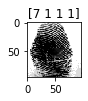

In [7]:
img_list = sorted(glob('Altered/Altered-Medium/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96, 1), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    img_r = img[:, :, np.newaxis]
    imgs[i] = img_r
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('dataset/x_medium.npz', data=imgs)
np.save('dataset/y_medium.npy', labels)

# plt.figure(figsize=(1, 1))
# plt.title(labels[-1])
# plt.imshow(imgs[-1], cmap='gray')

11884


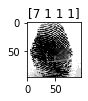

In [8]:
img_list = sorted(glob('Altered/Altered-Hard/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96, 1), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    img_r = img[:, :, np.newaxis]
    imgs[i] = img_r
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.savez('dataset/x_hard.npz', data=imgs)
np.save('dataset/y_hard.npy', labels)

# plt.figure(figsize=(1, 1))
# plt.title(labels[-1])
# plt.imshow(imgs[-1], cmap='gray')